In [1]:
# Dependencies
import pandas as pd
from prophet import Prophet
import logging
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from datetime import date
import numpy as np
from sklearn.model_selection import ParameterGrid
import seaborn as sns
from workalendar.usa import UnitedStates
from datetime import date
import warnings
import itertools
import random
import matplotlib.pyplot as plt

In [2]:
# Read the CSV files
csv_file = '../data/store.csv'

# Save CSV files into DataFrame
df = pd.read_csv(csv_file)

# Display DataFrame
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [3]:
# Filter the DataFrame based on store and item values
filtered_df = df[(df['store'] == 1) & (df['item'] == 1)]

# Select the required columns and rename them
history_pd = filtered_df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

# Sort the DataFrame by date
history_pd = history_pd.sort_values(by='ds')

# Reset the index of the DataFrame
history_pd = history_pd.reset_index(drop=True)

# Display DataFrame
history_pd

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
1821,2017-12-27,14
1822,2017-12-28,19
1823,2017-12-29,15
1824,2017-12-30,27


In [5]:
# disable informational messages from fbprophet
logging.getLogger('py4j').setLevel(logging.ERROR)

# set model parameters
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )
 
# fit the model to historical data
model.fit(history_pd)

11:23:53 - cmdstanpy - INFO - Chain [1] start processing
11:23:53 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Define a dataset including both historical dates & 90-days beyond the last available date
future_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )
 
# Predict over the dataset
forecast_pd = model.predict(future_pd)
 
# Display results
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,15.607400,1.586925,18.944069,15.607400,15.607400,-0.356003,-0.356003,-0.356003,-0.088820,-0.088820,-0.088820,-0.267183,-0.267183,-0.267183,0.0,0.0,0.0,10.051119
1,2013-01-02,15.613104,1.587805,19.562431,15.613104,15.613104,-0.325666,-0.325666,-0.325666,-0.059012,-0.059012,-0.059012,-0.266654,-0.266654,-0.266654,0.0,0.0,0.0,10.528451
2,2013-01-03,15.618808,2.660339,19.884549,15.618808,15.618808,-0.292318,-0.292318,-0.292318,-0.025382,-0.025382,-0.025382,-0.266936,-0.266936,-0.266936,0.0,0.0,0.0,11.053147
3,2013-01-04,15.624511,3.050446,20.095306,15.624511,15.624511,-0.216337,-0.216337,-0.216337,0.051654,0.051654,0.051654,-0.267991,-0.267991,-0.267991,0.0,0.0,0.0,12.244353
4,2013-01-05,15.630215,5.357788,22.591082,15.630215,15.630215,-0.118351,-0.118351,-0.118351,0.151404,0.151404,0.151404,-0.269755,-0.269755,-0.269755,0.0,0.0,0.0,13.780369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2018-03-27,22.766163,11.756006,28.479057,22.744080,22.795329,-0.118400,-0.118400,-0.118400,-0.088820,-0.088820,-0.088820,-0.029580,-0.029580,-0.029580,0.0,0.0,0.0,20.070650
1912,2018-03-28,22.767908,11.239922,30.021243,22.745046,22.797746,-0.085724,-0.085724,-0.085724,-0.059012,-0.059012,-0.059012,-0.026712,-0.026712,-0.026712,0.0,0.0,0.0,20.816146
1913,2018-03-29,22.769652,13.913833,29.989938,22.746283,22.800163,-0.049246,-0.049246,-0.049246,-0.025382,-0.025382,-0.025382,-0.023864,-0.023864,-0.023864,0.0,0.0,0.0,21.648336
1914,2018-03-30,22.771397,14.759818,32.970603,22.747784,22.802577,0.030675,0.030675,0.030675,0.051654,0.051654,0.051654,-0.020980,-0.020980,-0.020980,0.0,0.0,0.0,23.469900


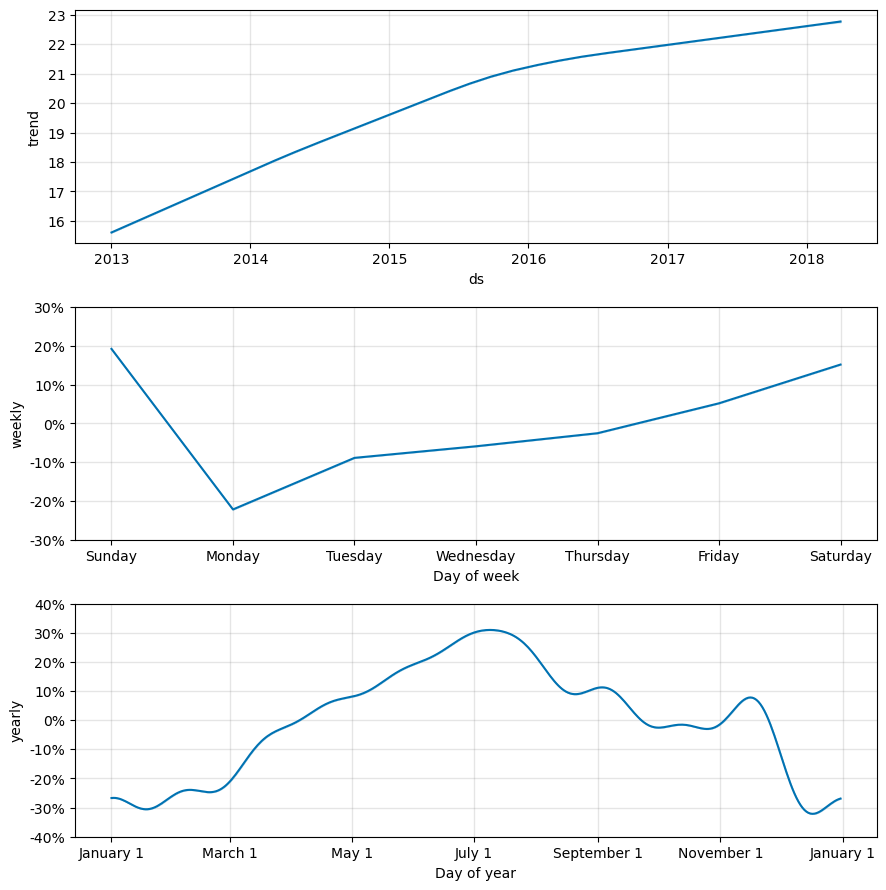

In [8]:
trends_fig = model.plot_components(forecast_pd)

(17171.75, 17626.75)

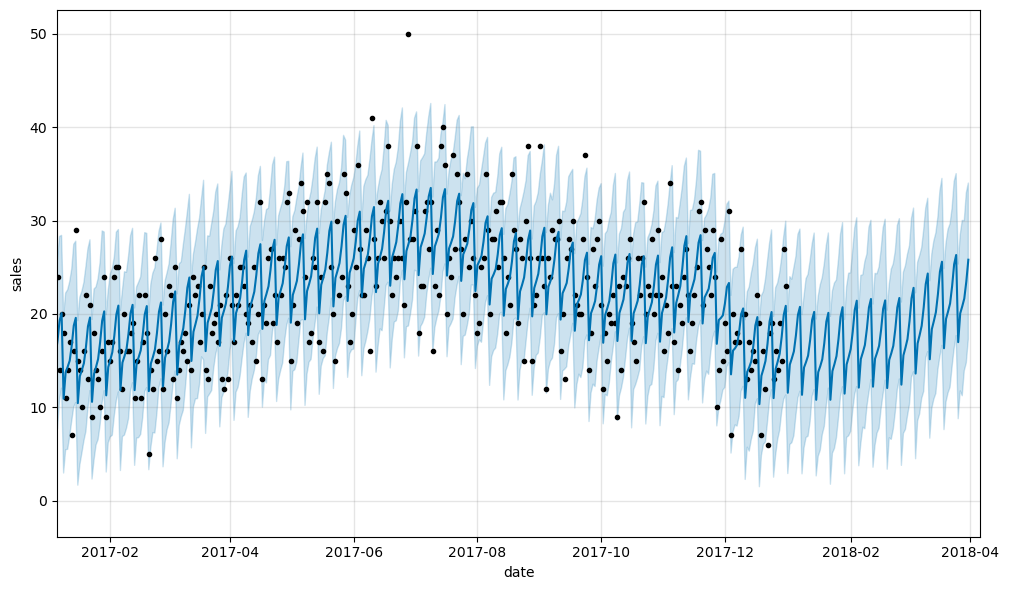

In [9]:
predict_fig = model.plot( forecast_pd, xlabel='date', ylabel='sales')
 
# adjust figure to display dates from last year + the 90 day forecast
xlim = predict_fig.axes[0].get_xlim()
new_xlim = ( xlim[1]-(180.0+365.0), xlim[1]-90.0)
predict_fig.axes[0].set_xlim(new_xlim)

In [10]:
# Convert the 'ds' column to datetime format if it's not already
history_pd['ds'] = pd.to_datetime(history_pd['ds'])
forecast_pd['ds'] = pd.to_datetime(forecast_pd['ds'])
 
# get historical actuals & predictions for comparison
actuals_pd = history_pd[history_pd['ds'].dt.date < date(2017, 1, 1)]['y']
predicted_pd = forecast_pd[forecast_pd['ds'].dt.date < date(2017, 1, 1)]['yhat']
 
# calculate evaluation metrics
mae = mean_absolute_error(actuals_pd, predicted_pd)
mse = mean_squared_error(actuals_pd, predicted_pd)
rmse = sqrt(mse)
 
# print metrics to the screen
print( '\n'.join(['MAE: {0}', 'MSE: {1}', 'RMSE: {2}']).format(mae, mse, rmse) )

MAE: 3.4070271209628746
MSE: 18.69332381240947
RMSE: 4.323577663510796


In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
mape = mean_absolute_percentage_error(actuals_pd, predicted_pd)
 
print('MAPE: {}'.format(mape))

MAPE: 20.412511952412476


In [14]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [15]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
 
# Create holidays DataFrame
holiday = pd.DataFrame([])
holidays = UnitedStates()
years = [2013, 2014, 2015, 2016]
 
for year in years:
    for date, name in holidays.holidays(year):
        holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
 
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
 
 
# Set start and end dates for the evaluation
strt = '2013-01-01'
end = '2016-12-31'
 
# Grid of parameters to search
grid = {'changepoint_prior_scale': [0.1, 0.5, 0.001, 0.15],
        'holidays_prior_scale': [0.1, 0.5, 0.001, 0.15],
        'n_changepoints': [100, 200, 300],
        'seasonality_mode': ['multiplicative', 'additive']}
 
# Perform the search
model_parameters = pd.DataFrame(columns=['MAPE', 'Parameters'])
for p in itertools.product(*grid.values()):
    params = dict(zip(grid.keys(), p))
    print(params)
 
    train_model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                          holidays_prior_scale=params['holidays_prior_scale'],
                          n_changepoints=params['n_changepoints'],
                          seasonality_mode=params['seasonality_mode'],
                          weekly_seasonality=True,
                          daily_seasonality=True,
                          yearly_seasonality=True,
                          holidays=holiday,
                          interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(history_pd)
    train_forecast = train_model.make_future_dataframe(periods=0, freq='D', include_history=True)
    train_forecast = train_model.predict(train_forecast)
    test = train_forecast[(train_forecast['ds'] >= pd.to_datetime(strt)) & (train_forecast['ds'] <= pd.to_datetime(end))][['ds', 'yhat']]
    Actual = history_pd[(history_pd['ds'] >= pd.to_datetime(strt)) & (history_pd['ds'] <= pd.to_datetime(end))]
    MAPE = mean_absolute_percentage_error(Actual['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------', MAPE)
    model_parameters = model_parameters.append({'MAPE': MAPE, 'Parameters': params}, ignore_index=True)


14:04:03 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:03 - cmdstanpy - INFO - Chain [1] done processing
14:04:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.373660666560394
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:04 - cmdstanpy - INFO - Chain [1] done processing
14:04:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.405567359794567
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:04 - cmdstanpy - INFO - Chain [1] done processing
14:04:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.381892694105144
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:05 - cmdstanpy - INFO - Chain [1] done processing
14:04:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.41007551637385
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:06 - cmdstanpy - INFO - Chain [1] done processing
14:04:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.376275228470035
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:06 - cmdstanpy - INFO - Chain [1] done processing
14:04:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.407512938976367
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:07 - cmdstanpy - INFO - Chain [1] done processing
14:04:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.344471065941857
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:07 - cmdstanpy - INFO - Chain [1] done processing
14:04:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.39966729656603
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:08 - cmdstanpy - INFO - Chain [1] done processing
14:04:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.352262911673254
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:09 - cmdstanpy - INFO - Chain [1] done processing
14:04:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.401568489440578
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:10 - cmdstanpy - INFO - Chain [1] done processing
14:04:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.348036022814362
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:11 - cmdstanpy - INFO - Chain [1] done processing
14:04:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.39709143642595
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:11 - cmdstanpy - INFO - Chain [1] done processing
14:04:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.40584442383525
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:12 - cmdstanpy - INFO - Chain [1] done processing
14:04:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.47187706483588
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:12 - cmdstanpy - INFO - Chain [1] done processing
14:04:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.408851196534506
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:13 - cmdstanpy - INFO - Chain [1] done processing
14:04:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.471887858223504
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:14 - cmdstanpy - INFO - Chain [1] done processing
14:04:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.41386590485462
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:14 - cmdstanpy - INFO - Chain [1] done processing
14:04:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.469711970916475
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:15 - cmdstanpy - INFO - Chain [1] done processing
14:04:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.36177463968288
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:15 - cmdstanpy - INFO - Chain [1] done processing
14:04:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.399201747723684
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:16 - cmdstanpy - INFO - Chain [1] done processing
14:04:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.359740770186917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:17 - cmdstanpy - INFO - Chain [1] done processing
14:04:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.39797038990237
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:18 - cmdstanpy - INFO - Chain [1] done processing
14:04:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.364740825973023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:18 - cmdstanpy - INFO - Chain [1] done processing
14:04:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.39826143224466
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:19 - cmdstanpy - INFO - Chain [1] done processing
14:04:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.34587830183697
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:20 - cmdstanpy - INFO - Chain [1] done processing
14:04:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.28853492121307
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:21 - cmdstanpy - INFO - Chain [1] done processing
14:04:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.34304134894904
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:22 - cmdstanpy - INFO - Chain [1] done processing
14:04:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.287249132883726
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:23 - cmdstanpy - INFO - Chain [1] done processing
14:04:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.34534432628676
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:25 - cmdstanpy - INFO - Chain [1] done processing
14:04:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.287459794060577
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:26 - cmdstanpy - INFO - Chain [1] done processing
14:04:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.314529271052557
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:27 - cmdstanpy - INFO - Chain [1] done processing
14:04:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.274532149330486
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:28 - cmdstanpy - INFO - Chain [1] done processing
14:04:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.315085421048796
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:29 - cmdstanpy - INFO - Chain [1] done processing
14:04:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.274942290119643
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:31 - cmdstanpy - INFO - Chain [1] done processing
14:04:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.312526741060253
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:33 - cmdstanpy - INFO - Chain [1] done processing
14:04:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.273737501523723
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:35 - cmdstanpy - INFO - Chain [1] done processing
14:04:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.286913837787864
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:36 - cmdstanpy - INFO - Chain [1] done processing
14:04:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.352015861718662
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:39 - cmdstanpy - INFO - Chain [1] done processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.3199007497828
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:41 - cmdstanpy - INFO - Chain [1] done processing
14:04:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.35177176321441
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:45 - cmdstanpy - INFO - Chain [1] done processing
14:04:45 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.32931646493619
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:47 - cmdstanpy - INFO - Chain [1] done processing
14:04:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.35160670700458
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:47 - cmdstanpy - INFO - Chain [1] done processing
14:04:48 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.332052712396887
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:48 - cmdstanpy - INFO - Chain [1] done processing
14:04:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.282154132198787
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:49 - cmdstanpy - INFO - Chain [1] done processing
14:04:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.334976722222002
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:51 - cmdstanpy - INFO - Chain [1] done processing
14:04:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.28108302761654
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:52 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.332968139036538
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:54 - cmdstanpy - INFO - Chain [1] done processing
14:04:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.280609046495986
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:04:55 - cmdstanpy - INFO - Chain [1] done processing
14:04:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.376831097790507
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:04:55 - cmdstanpy - INFO - Chain [1] done processing
14:04:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.55127032010375
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:04:56 - cmdstanpy - INFO - Chain [1] done processing
14:04:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.113838863613374
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:04:57 - cmdstanpy - INFO - Chain [1] done processing
14:04:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.229056112139048
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:04:58 - cmdstanpy - INFO - Chain [1] done processing
14:04:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.237949588230574
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:04:59 - cmdstanpy - INFO - Chain [1] done processing
14:04:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.4195730891871
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:00 - cmdstanpy - INFO - Chain [1] done processing
14:05:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.327534860583143
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:00 - cmdstanpy - INFO - Chain [1] done processing
14:05:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.147085792610763
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:01 - cmdstanpy - INFO - Chain [1] done processing
14:05:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.057963704877906
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:02 - cmdstanpy - INFO - Chain [1] done processing
14:05:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.177949729349272
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:03 - cmdstanpy - INFO - Chain [1] done processing
14:05:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.386231284297693
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:04 - cmdstanpy - INFO - Chain [1] done processing
14:05:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.361937056256775
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:05 - cmdstanpy - INFO - Chain [1] done processing
14:05:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.15674942510943
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:05 - cmdstanpy - INFO - Chain [1] done processing
14:05:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.137633414885062
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:06 - cmdstanpy - INFO - Chain [1] done processing
14:05:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.173475144347524
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:07 - cmdstanpy - INFO - Chain [1] done processing
14:05:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.155265225396267
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:07 - cmdstanpy - INFO - Chain [1] done processing
14:05:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.204333545072643
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:08 - cmdstanpy - INFO - Chain [1] done processing
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.167363242959535
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.374550168865653
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:09 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.263708683162594
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:10 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.264038655327553
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:10 - cmdstanpy - INFO - Chain [1] done processing
14:05:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.17232460352407
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:11 - cmdstanpy - INFO - Chain [1] done processing
14:05:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.271006309924445
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:13 - cmdstanpy - INFO - Chain [1] done processing
14:05:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.300878711846025
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:13 - cmdstanpy - INFO - Chain [1] done processing
14:05:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.37584302601508
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:14 - cmdstanpy - INFO - Chain [1] done processing
14:05:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.38590224230557
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:15 - cmdstanpy - INFO - Chain [1] done processing
14:05:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.376872713161028
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:16 - cmdstanpy - INFO - Chain [1] done processing
14:05:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.367322913923765
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:17 - cmdstanpy - INFO - Chain [1] done processing
14:05:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.376778174158943
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:17 - cmdstanpy - INFO - Chain [1] done processing
14:05:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.389721182344957
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:18 - cmdstanpy - INFO - Chain [1] done processing
14:05:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.34147389591612
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:18 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.383949217772496
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:19 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.342944743023992
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:20 - cmdstanpy - INFO - Chain [1] done processing
14:05:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.37170506007985
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:21 - cmdstanpy - INFO - Chain [1] done processing
14:05:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.346099002040578
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.5, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:22 - cmdstanpy - INFO - Chain [1] done processing
14:05:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.377746769161504
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:22 - cmdstanpy - INFO - Chain [1] done processing
14:05:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.406351646011885
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:23 - cmdstanpy - INFO - Chain [1] done processing
14:05:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.46132862589392
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:23 - cmdstanpy - INFO - Chain [1] done processing
14:05:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.406884211856312
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:24 - cmdstanpy - INFO - Chain [1] done processing
14:05:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.45507787414863
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.407465972694503
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.001, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:26 - cmdstanpy - INFO - Chain [1] done processing
14:05:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.451303218187842
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


14:05:26 - cmdstanpy - INFO - Chain [1] done processing
14:05:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.36249613801689
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


14:05:27 - cmdstanpy - INFO - Chain [1] done processing
14:05:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.375721127104157
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


14:05:27 - cmdstanpy - INFO - Chain [1] done processing
14:05:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.36384030474902
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


14:05:28 - cmdstanpy - INFO - Chain [1] done processing
14:05:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.376023303074096
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'multiplicative'}


14:05:29 - cmdstanpy - INFO - Chain [1] done processing
14:05:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.36131222570134
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 300, 'seasonality_mode': 'additive'}


14:05:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.375076714277842


In [16]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,20.057964,"{'changepoint_prior_scale': 0.001, 'holidays_p..."
1,20.113839,"{'changepoint_prior_scale': 0.001, 'holidays_p..."
2,20.137633,"{'changepoint_prior_scale': 0.001, 'holidays_p..."
3,20.147086,"{'changepoint_prior_scale': 0.001, 'holidays_p..."
4,20.155265,"{'changepoint_prior_scale': 0.001, 'holidays_p..."


In [17]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.001,
 'holidays_prior_scale': 0.5,
 'n_changepoints': 200,
 'seasonality_mode': 'multiplicative'}

In [23]:
def train_prophet_model(store, item):

    # Load data into a Pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Filter DataFrame for store and item
    df = df[(df['store'] == store) & (df['item'] == item)]
 
    # Select ds and y columns
    df = df[['date', 'sales']]
    df.columns = ['ds', 'y']
 
    # Set model parameters using best parameters
    model = Prophet(
        interval_width=0.95,
        growth='linear',
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.001,
        holidays_prior_scale=0.5,
        n_changepoints=200,
        seasonality_mode='multiplicative'
    )
    
    # Train the Prophet model
    model.fit(df)
 
    return model

In [24]:
# Get the unique stores and items
unique_stores = df['store'].unique().tolist()
unique_items = df['item'].unique().tolist()

In [25]:
# Initialize a dictionary to store the models
models = {}
 
# Iterate through all store and item combos
for store in unique_stores:
    for item in unique_items:
        model = train_prophet_model(store, item)
        models[(store, item)] = model


14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmd

KeyboardInterrupt: 